In [32]:
import os, random, cv2
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:


def load_googlemaps_data():
    print("Loading google maps ship data")
    ships_path = '../../data/raw/googlemaps'
    images, labels = [], []
    for folder in os.listdir(ships_path):
        label = int(folder)
        for file in tqdm(os.listdir(os.path.join(ships_path,folder))):
            img_path = os.path.join(ships_path,folder,file)

            img = cv2.imread(img_path)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (48,48))

            images.append(img)
            labels.append(label)
            pass
        pass
    images = np.array(images,dtype=np.float32)/255.0
    labels = np.array(labels,dtype=np.float32)

    print("Loaded google maps ship data")
    return images, labels


# Loading data

100%|██████████| 4/4 [00:00<00:00, 235.29it/s]


Loading google maps ship data
Loaded google maps ship data
labels: [0. 0. 0. 0. 1. 1. 1. 1.]


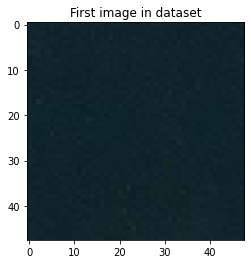

In [31]:
images, labels = load_googlemaps_data()

plt.title("First image in dataset")
plt.imshow(images[0])
print(f"labels: {labels}")

# Loading model

In [26]:
model = tf.keras.models.load_model('../../models/ship-model-cnn.h5')
model.summary()
    

Model: "Feature_Extraction_and_FC"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 58, 58, 3)         0         
_________________________________________________________________
conv1 (Conv2D)               (None, 29, 29, 16)        448       
_________________________________________________________________
bn_conv1 (BatchNormalization (None, 29, 29, 16)        64        
_________________________________________________________________
conv_2A_branch2a (Conv2D)    (None, 29, 29, 32)        4640      
_________________________________________________________________
bn_2A_branch2a (BatchNormali (None, 29, 29, 32)        128       
_________________________________________________________________
activation (Activation)      (None, 29, 2

# Checking the model

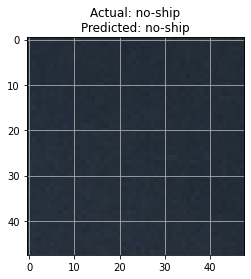

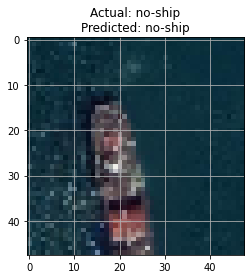

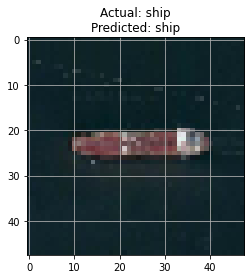

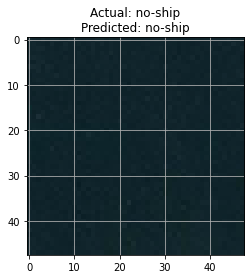

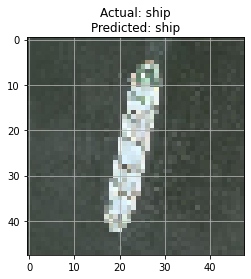

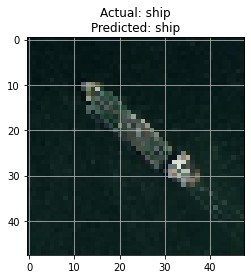

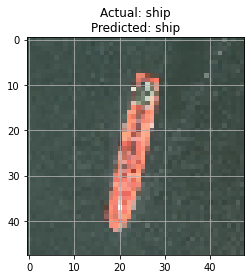

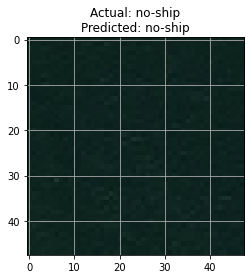

In [35]:
google_images_predict = model.predict(images)
google_images_predict = np.argmax(google_images_predict, axis=1)

class_names = ["no-ship","ship"]
class_name_labels = {class_name:i for i,class_name in enumerate(class_names)}

rnd_idx = random.sample(range(0, len(images)), len(images))
class_labels = {i:class_name for (class_name,i) in class_name_labels.items()}
for i,idx in enumerate(rnd_idx):

    plt.imshow(images[idx])
    plt.title("Actual: {}\nPredicted: {}".format(class_labels[labels[idx]],class_labels[google_images_predict[idx]]))
    plt.grid(None)
    plt.show()
    pass